In [355]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cu-boulder-dassa-hackathon-2/submission_sample.csv
/kaggle/input/cu-boulder-dassa-hackathon-2/train_data.csv
/kaggle/input/cu-boulder-dassa-hackathon-2/test_data.csv


In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
df = pd.read_csv("/kaggle/input/cu-boulder-dassa-hackathon-2/train_data.csv")

In [358]:
df

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,0,4/27/2020 6:55
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,0,4/27/2020 7:00
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,0,4/27/2020 7:05
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,0,4/27/2020 7:10


In [359]:
df.head().T

,0,1,2,3,4
Period Code,1,1,1,1,1
Cycle ID,1,2,3,4,5
B_2,-0.0007,0.0019,-0.0043,0.0007,-0.0019
B_3,-0.0004,-0.0003,0.0003,0,-0.0002
B_4,100,100,100,100,100
B_5,518.67,518.67,518.67,518.67,518.67
B_9,14.62,14.62,14.62,14.62,14.62
B_10,21.61,21.61,21.61,21.61,21.61
B_14,1.3,1.3,1.3,1.3,1.3
B_15,47.47,47.49,47.27,47.13,47.28


In [360]:
df.dtypes

Period Code    object
Cycle ID       object
B_2            object
B_3            object
B_4            object
B_5            object
B_9            object
B_10           object
B_14           object
B_15           object
B_16           object
B_17           object
B_18           object
B_19           object
B_20           object
B_21           object
B_22           object
B_23           object
B_24           object
B_25           object
Good/Bad       object
timestamp      object
dtype: object

In [361]:
df.isnull().sum()

Period Code    29
Cycle ID       36
B_2            40
B_3            44
B_4            42
B_5            35
B_9            29
B_10           44
B_14           44
B_15           46
B_16           37
B_17           41
B_18           35
B_19           37
B_20           40
B_21           29
B_22           27
B_23           31
B_24           41
B_25           37
Good/Bad       39
timestamp       0
dtype: int64

In [362]:
df.dropna(inplace=True)

In [363]:
df.isnull().sum()

Period Code    0
Cycle ID       0
B_2            0
B_3            0
B_4            0
B_5            0
B_9            0
B_10           0
B_14           0
B_15           0
B_16           0
B_17           0
B_18           0
B_19           0
B_20           0
B_21           0
B_22           0
B_23           0
B_24           0
B_25           0
Good/Bad       0
timestamp      0
dtype: int64

In [364]:
df

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,0,4/27/2020 6:55
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,0,4/27/2020 7:00
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,0,4/27/2020 7:05
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,0,4/27/2020 7:10


In [365]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

Period Code
['1' 'start' '2' 'stop' 'Missing' 'no connection' 'Bad' '3' 'No Data'
 'I/O']
90

Cycle ID
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10']
369

B_2
['-0.0007' '0.0019' '-0.0043' '0.0007' '-0.0019' '0.001' '-0.0034'
 '0.0008' '-0.0033' '0.0018']
163

B_3
['-0.0004' '-0.0003' '0.0003' '0' '-0.0002' '-0.0001' '0.0001' '0.0002'
 '0.0004' '0.0005']
21

B_4
['100' 'I/O' 'No Data' 'stop' 'Missing' 'Bad' 'start' 'no response'
 'no connection']
9

B_5
['518.67' 'stop' 'No Data' 'no response' 'Missing' 'no connection' 'start'
 'I/O' 'Bad']
9

B_9
['14.62' 'no response' 'Bad' 'Missing' 'stop' 'I/O' 'no connection'
 'start' 'No Data']
9

B_10
['21.61' 'Missing' '21.6' 'Bad' 'no response' 'No Data' 'I/O' 'start'
 'stop' 'no connection']
10

B_14
['1.3' 'No Data' 'Bad' 'no response' 'stop' 'I/O' 'Missing' 'start'
 'no connection']
9

B_15
['47.47' '47.49' '47.27' '47.13' '47.28' '47.16' '47.36' '47.24' '47.29'
 '47.03']
165

B_16
['521.66' '522.28' '522.42' '522.86' '522.19' '521.68' '522.32'

In [366]:
df['Good/Bad'] = df['Good/Bad'].replace({'Bad': 1})

In [367]:
df["B_5"].value_counts()

B_5
518.67           15477
no response         40
stop                38
start               35
I/O                 35
Bad                 35
no connection       33
No Data             26
Missing             24
Name: count, dtype: int64

In [368]:
df.drop(columns=["B_4", "B_5", "B_9", "B_10", "B_14", "B_20", "B_22", "B_23"], inplace=True)

In [369]:
df

,Period Code,Cycle ID,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,47.49,522.28,2388.07,8131.49,8.4318,392,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,47.28,522.19,2388.04,8133.8,8.4294,393,38.9,23.4044,0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,47.48,521.37,2388.05,8163.51,8.4098,392,38.88,23.3777,0,4/27/2020 6:55
16500,82,123,0.0016,0.0002,47.15,522.09,stop,8153.63,8.3746,392,38.89,23.3542,0,4/27/2020 7:00
16501,82,124,Missing,-0.0005,47.48,522.52,2388,8162.75,8.414,391,38.9,23.3692,0,4/27/2020 7:05
16502,82,125,0.0001,-0.0002,47.12,522.38,2388,8150.24,8.4058,391,38.99,23.4025,0,4/27/2020 7:10


In [370]:
numeric_columns = ['B_2', 'B_3', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_21', 'B_24', 'B_25', "Good/Bad"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [371]:
a = df.corr(numeric_only=True)
a

,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,Good/Bad
B_2,1.000000,0.011607,0.013033,0.000286,0.000360,-0.001790,0.001585,0.003742,-0.002822,-0.013766,0.007026
B_3,0.011607,1.000000,0.011985,-0.009925,0.020709,-0.013922,0.007937,0.013458,-0.008760,-0.013127,0.004799
B_15,0.013033,0.011985,1.000000,-0.846562,0.781545,0.152533,0.781793,0.721985,-0.770883,-0.774234,0.656731
B_16,0.000286,-0.009925,-0.846562,1.000000,-0.790251,-0.084819,-0.765983,-0.702577,0.751648,0.754864,-0.631549
B_17,0.000360,0.020709,0.781545,-0.790251,1.000000,-0.163818,0.697421,0.627070,-0.684206,-0.689704,0.527768
B_18,-0.001790,-0.013922,0.152533,-0.084819,-0.163818,1.000000,0.184978,0.236736,-0.177788,-0.185938,0.345103
B_19,0.001585,0.007937,0.781793,-0.765983,0.697421,0.184978,1.000000,0.668401,-0.705915,-0.702467,0.613257
B_21,0.003742,0.013458,0.721985,-0.702577,0.627070,0.236736,0.668401,1.000000,-0.652241,-0.657706,0.580727
B_24,-0.002822,-0.008760,-0.770883,0.751648,-0.684206,-0.177788,-0.705915,-0.652241,1.000000,0.692342,-0.593099
B_25,-0.013766,-0.013127,-0.774234,0.754864,-0.689704,-0.185938,-0.702467,-0.657706,0.692342,1.000000,-0.605277


<Axes: >

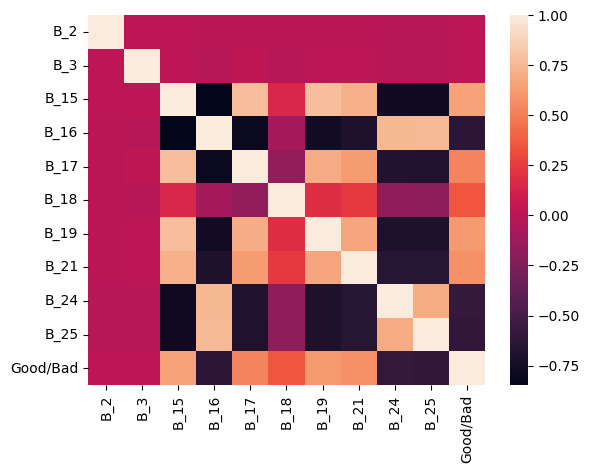

In [372]:
sns.heatmap(a)

In [373]:
df.describe().round()

,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,Good/Bad
count,15481.0,15468.0,15492.0,15472.0,15463.0,15475.0,15473.0,15474.0,15484.0,15459.0,15516.0
mean,0.0,0.0,48.0,521.0,2388.0,8144.0,8.0,393.0,39.0,23.0,0.0
std,0.0,0.0,0.0,1.0,0.0,20.0,0.0,2.0,0.0,0.0,0.0
min,-0.0,-0.0,47.0,519.0,2388.0,8100.0,8.0,388.0,38.0,23.0,0.0
25%,-0.0,-0.0,47.0,521.0,2388.0,8133.0,8.0,392.0,39.0,23.0,0.0
50%,0.0,0.0,48.0,521.0,2388.0,8141.0,8.0,393.0,39.0,23.0,0.0
75%,0.0,0.0,48.0,522.0,2388.0,8149.0,8.0,394.0,39.0,23.0,0.0
max,0.0,0.0,49.0,523.0,2389.0,8294.0,9.0,399.0,39.0,24.0,1.0


In [374]:
df.drop(columns = ["Period Code", "Cycle ID", "timestamp"], inplace=True)

In [375]:
df

,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,Good/Bad
0,-0.0007,-0.0004,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,0.0
1,0.0019,-0.0003,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,0.0
2,-0.0043,0.0003,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,0.0
3,0.0007,0.0000,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,0.0
4,-0.0019,-0.0002,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16499,-0.0001,0.0002,47.48,521.37,2388.05,8163.51,8.4098,392.0,38.88,23.3777,0.0
16500,0.0016,0.0002,47.15,522.09,NaN,8153.63,8.3746,392.0,38.89,23.3542,0.0
16501,NaN,-0.0005,47.48,522.52,2388.00,8162.75,8.4140,391.0,38.90,23.3692,0.0
16502,0.0001,-0.0002,47.12,522.38,2388.00,8150.24,8.4058,391.0,38.99,23.4025,0.0


In [376]:
df.dropna(inplace=True)

In [377]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

B_2
[-0.0007  0.0019 -0.0043  0.0007 -0.0019  0.001  -0.0034  0.0008 -0.0033
  0.0018]
152

B_3
[-0.0004 -0.0003  0.0003  0.     -0.0002 -0.0001  0.0001  0.0002  0.0004
  0.0005]
13

B_15
[47.47 47.49 47.27 47.13 47.28 47.16 47.36 47.24 47.29 47.03]
156

B_16
[521.66 522.28 522.42 522.86 522.19 521.68 522.32 522.47 521.79 521.4 ]
411

B_17
[2388.02 2388.07 2388.03 2388.08 2388.04 2388.05 2388.06 2388.01 2388.
 2388.13]
53

B_18
[8138.62 8131.49 8133.23 8133.83 8133.8  8132.85 8132.32 8131.07 8125.69
 8129.38]
5154

B_19
[8.4195 8.4318 8.4178 8.3682 8.4294 8.4108 8.3974 8.4076 8.3728 8.4286]
1823

B_21
[392. 390. 393. 391. 394. 396. 395. 397. 398. 389.]
12

B_24
[39.06 39.   38.95 38.88 38.9  38.98 39.1  38.97 39.05 38.94]
115

B_25
[23.419  23.4236 23.3442 23.3739 23.4044 23.3669 23.3774 23.3106 23.4066
 23.4694]
4262

Good/Bad
[0. 1.]
2



In [378]:
df["Good/Bad"].value_counts()

Good/Bad
0.0    11052
1.0     2002
Name: count, dtype: int64

In [379]:
df.dtypes

B_2         float64
B_3         float64
B_15        float64
B_16        float64
B_17        float64
B_18        float64
B_19        float64
B_21        float64
B_24        float64
B_25        float64
Good/Bad    float64
dtype: object

In [380]:
df.isnull().sum()

B_2         0
B_3         0
B_15        0
B_16        0
B_17        0
B_18        0
B_19        0
B_21        0
B_24        0
B_25        0
Good/Bad    0
dtype: int64

In [381]:
from imblearn.over_sampling import SMOTE
y = df['Good/Bad']
X = df.drop(columns=['Good/Bad'])

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [382]:
df = pd.concat([X_resampled, y_resampled], axis=1)
df.reset_index(drop=True, inplace=True)

In [383]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

In [384]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [385]:
y_train = (df_train["Good/Bad"] == 1)
y_test = (df_test["Good/Bad"] == 1)

In [386]:
del df_train["Good/Bad"]
del df_test["Good/Bad"]

In [387]:
df_train

,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25
0,0.000600,0.000100,47.160000,522.400000,2388.010000,8144.600000,8.382400,391.000000,39.010000,23.438500
1,0.000000,0.000100,47.590000,520.820000,2388.120000,8163.710000,8.466800,395.000000,38.540000,23.102400
2,0.001600,0.000200,47.680000,521.120000,2388.080000,8132.990000,8.430700,394.000000,38.940000,23.356500
3,0.002117,0.000358,48.048187,519.414806,2388.298961,8110.108310,8.486448,396.896126,38.578961,23.008663
4,-0.000615,0.000319,48.132452,519.740194,2388.268113,8145.433951,8.513862,395.000000,38.604145,23.107623
...,...,...,...,...,...,...,...,...,...,...
17678,0.003200,-0.000400,47.870000,520.610000,2388.100000,8173.660000,8.488700,395.000000,38.590000,23.119500
17679,-0.002000,-0.000400,47.470000,522.310000,2388.040000,8147.240000,8.398700,392.000000,39.000000,23.420300
17680,0.001113,-0.000048,47.974837,520.427894,2388.197418,8133.252758,8.478100,393.370923,38.525312,23.203304
17681,-0.000200,-0.000100,47.320000,521.630000,2387.990000,8146.690000,8.414600,393.000000,38.940000,23.367300


In [388]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [389]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [390]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [391]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [392]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)[:, 1]
y_pred

array([1. , 0.8, 0. , ..., 0.3, 0. , 0. ])

In [394]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    
    scores.append((n, auc))

In [395]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

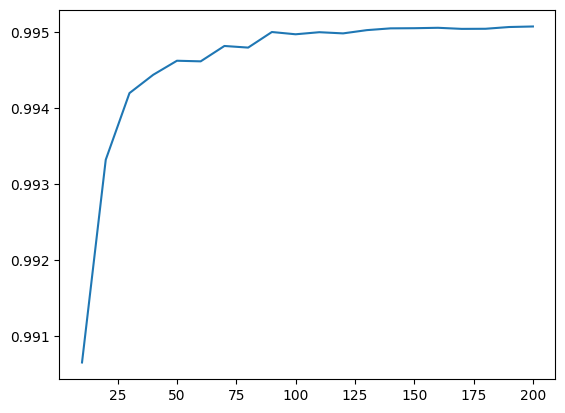

In [396]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [397]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)

        scores.append((d, n, auc))

In [398]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

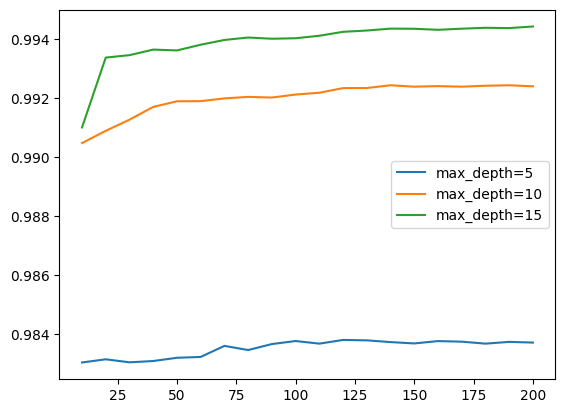

In [399]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [400]:
max_depth = 15

In [401]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)

        scores.append((s, n, auc))

In [402]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

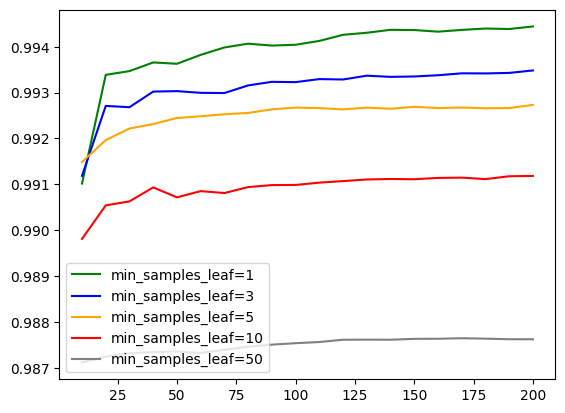

In [403]:
colors = ['green', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [404]:
max_auc = df_scores['auc'].max()
max_n_estimators = df_scores.loc[df_scores['auc'] == max_auc, 'n_estimators'].values[0]

print("Maximum AUC occurs at n_estimators =", max_n_estimators)

Maximum AUC occurs at n_estimators = 200


In [405]:
min_samples_leaf = 1

In [406]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=1)

In [407]:
y_pred = rf.predict(X_test)

In [408]:
roc_auc_score(y_test, y_pred)

0.967027681929999

In [409]:
test = pd.read_csv("/kaggle/input/cu-boulder-dassa-hackathon-2/test_data.csv")

In [410]:
test.shape

(4127, 21)

In [411]:
test.drop(columns=["B_4", "B_5", "B_9", "B_10", "B_14", "B_20", "B_22", "B_23"], inplace=True)

In [412]:
numeric_columns = ['B_2', 'B_3', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_21', 'B_24', 'B_25']
for col in numeric_columns:
    test[col] = pd.to_numeric(test[col], errors='coerce')

In [413]:
test2 = test.drop(columns = ["Period Code", "Cycle ID", "timestamp"])

In [414]:
test1_dicts = test2.fillna(0).to_dict(orient='records')
X_test1 = dv.transform(test1_dicts)

In [415]:
y_pred = rf.predict(X_test1)

In [416]:
y_pred = y_pred.astype(int)

In [417]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [418]:
new_df = pd.DataFrame({'ID': test['timestamp'].astype(str) + '-' + test['Cycle ID'].astype(str)})

In [419]:
new_df['Good/Bad'] = y_pred

In [240]:
new_df.to_csv("/kaggle/working/submission.csv", index=False)

In [241]:
y_pred.shape

(4127,)